In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('../data/raw/credit_data.csv')
df.head()

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


In [4]:
df['default'].value_counts()

default
0    1717
1     283
Name: count, dtype: int64

In [5]:
# we found that there are some negative ages in the dataset
df[df['age']<0]

,clientid,income,age,loan,default
15,16,50501.72669,-28.218361,3977.287432,0
21,22,32197.62070,-52.423280,4244.057136,0
26,27,63287.03891,-36.496976,9595.286289,0


In [22]:
# Go to specific rows and columns
df.loc[df['age']<=0, 'age']=np.nan

In [23]:
df[df['age']<=0]

,clientid,income,age,loan,default,loan_log


In [8]:
df[df['age'].isnull()]

,clientid,income,age,loan,default
15,16,50501.72669,NaN,3977.287432,0
21,22,32197.62070,NaN,4244.057136,0
26,27,63287.03891,NaN,9595.286289,0
28,29,59417.80541,NaN,2082.625938,0
30,31,48528.85280,NaN,6155.784670,0
31,32,23526.30256,NaN,2862.010139,0


In [ ]:
# fill missing ages with median age
# we dont use mean because the outliers ie negative values can pull the mean and skew the data
median_age=df['age'].median()
median_age

41.382673444999995

In [27]:
df['age']=df['age'].fillna(median_age)

In [29]:
df['age'].isnull().sum()

0

In [30]:
df['age'] = df['age'].round().astype('Int64')

In [31]:
df.head()

,clientid,income,age,loan,default,loan_log
0,1,66155.92510,59,8106.532131,0,9.000549
1,2,34415.15397,48,6564.745018,0,8.789621
2,3,57317.17006,63,8020.953296,0,8.989937
3,4,42709.53420,46,6103.642260,0,8.716805
4,5,66952.68885,19,8770.099235,1,9.079217


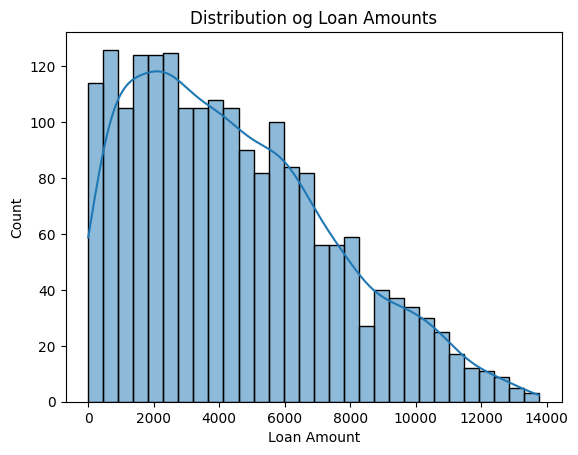

In [14]:
# loan column is right skewed, its outliers need to be handled
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['loan'], bins=30, kde=True)
plt.xlabel('Loan Amount')
plt.title('Distribution og Loan Amounts')
plt.show()

In [32]:
# Right skewness can cause coefficients to be disproportionately influenced by extreme values
# log-transformed loan amount to handle right skewness and stabilize probability estimates
df['loan_log']=np.log1p(df['loan'])
df[['loan','loan_log']].head(10)

,loan,loan_log
0,8106.532131,9.000549
1,6564.745018,8.789621
2,8020.953296,8.989937
3,6103.642260,8.716805
4,8770.099235,9.079217
5,15.498598,2.803275
6,5722.581981,8.652350
7,2971.003310,7.996992
8,4755.825280,8.467336
9,1409.230371,7.251508


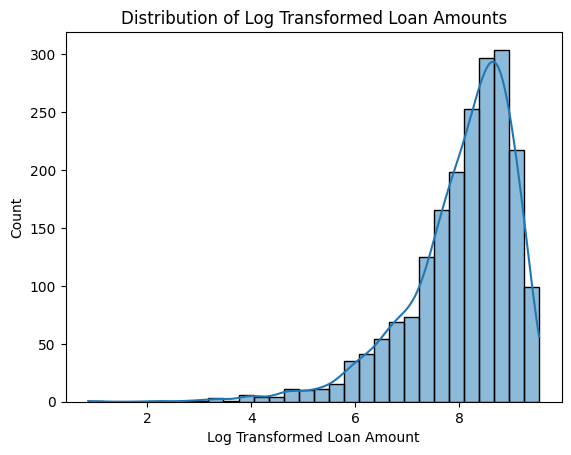

In [16]:
sns.histplot(df['loan_log'], bins=30, kde=True)
plt.xlabel('Log Transformed Loan Amount')
plt.title('Distribution of Log Transformed Loan Amounts')
plt.show()

In [33]:
# validating cleaning
df.describe()

,clientid,income,age,loan,default,loan_log
count,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.9285,4444.369695,0.141500,8.040078
std,577.494589,14326.327119,13.262705,3045.410024,0.348624,1.040545
min,1.000000,20014.489470,18.0,1.377630,0.000000,0.866104
25%,500.750000,32796.459720,29.0,1939.708847,0.000000,7.570808
50%,1000.500000,45789.117310,41.0,3974.719418,0.000000,8.287961
75%,1500.250000,57791.281670,53.0,6432.410625,0.000000,8.769260
max,2000.000000,69995.685580,64.0,13766.051240,1.000000,9.530033


In [34]:
df.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
loan_log    0
dtype: int64

In [35]:
df.to_csv('../data/processed/credit_data_cleaned.csv', index=False)